# Group Project

Karapet Ghazanjyan, Mesrop Mesropyan, Mikayel Barseghyan, Ann Marie Vardgesyan

**Album Data**

id: Unique identifier for each album.

name: The name of the album.

album_type: Describes if it's an album, single, or compilation.

release_date: The date when the album was released.

popularity: Score from 0 to 100 representing the album's popularity.

**Track Data**
id: Unique identifier for each track.

name: The name of the track.

duration: Length of the track (usually in milliseconds but converted to minutes).

popularity: Popularity score of the track (0 to 100).

**Audio Features (Technical aspects of tracks**)

acousticness: Score (0 to 1) showing how "acoustic" the track is.

danceability: Score (0 to 1) showing how suitable the track is for dancing.

energy: Measures track intensity; higher scores mean more intensity.

instrumentalness: Measures how likely the track is instrumental (no vocals).

loudness: The volume of the track, measured in decibels (dB).

speechiness: Measures how much of the track contains spoken words (like in rap or podcasts).

tempo: The speed of the track, measured in beats per minute (BPM).

valence: Describes the mood of the track; higher scores mean happier and more positive vibes.

**Artist Data**

id: Unique identifier for each artist.

name: The name of the artist.

followers: Number of followers the artist has on Spotify.

popularity: Popularity score of the artist (0 to 100).

**Genres Data**

id: Unique identifier for each genre.

name: The name of the genre.

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns




In [ ]:
conn = sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/spotify.sqlite" )

In [ ]:
cur= conn.cursor()

In [ ]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
cur.execute(query)
cur.fetchall()

[('albums',),
 ('artists',),
 ('audio_features',),
 ('genres',),
 ('r_albums_artists',),
 ('r_albums_tracks',),
 ('r_artist_genre',),
 ('r_track_artist',),
 ('tracks',)]

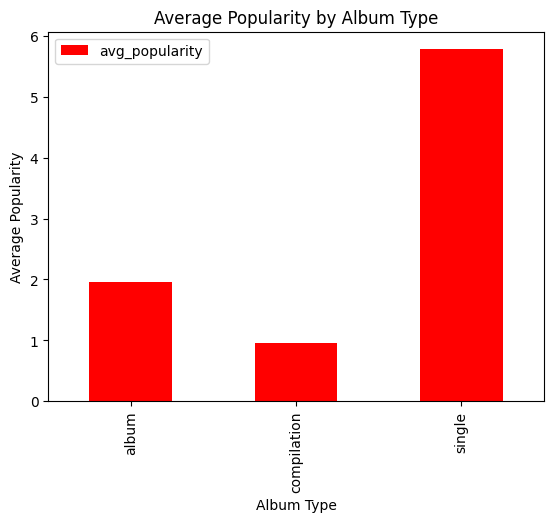

In [ ]:
query = """
SELECT
    album_type,
    AVG(popularity) AS avg_popularity
FROM albums
GROUP BY album_type;
"""
df = pd.read_sql(query, conn)
df.plot(kind='bar', x='album_type', y='avg_popularity', title="Average Popularity by Album Type", color='red')
plt.xlabel("Album Type")
plt.ylabel("Average Popularity")
plt.show()


**Singles are more popular **

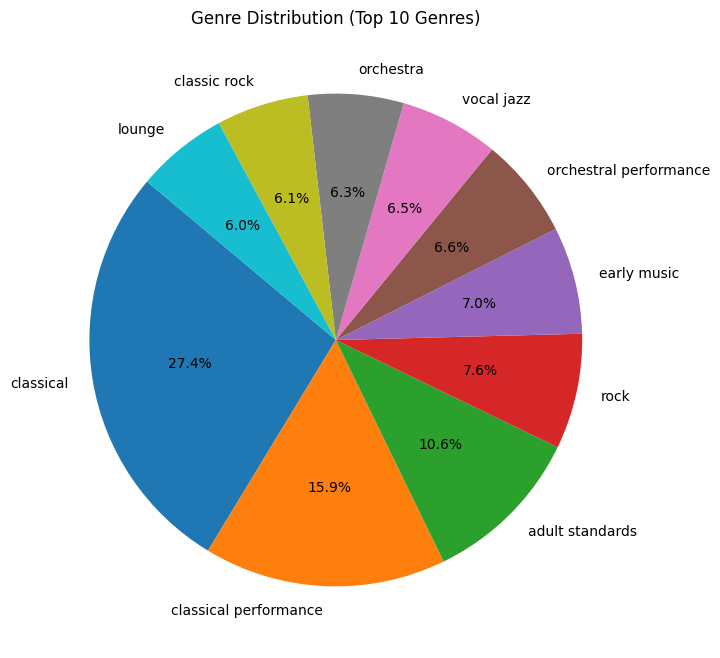

In [ ]:
query = """
SELECT
    genres.id AS genre_id,
    COUNT(tracks.id) AS track_count
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY track_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(8, 8))
plt.pie(df['track_count'], labels=df['genre_id'], autopct='%1.1f%%', startangle=140)
plt.title("Genre Distribution (Top 10 Genres)")
plt.show()


**Majority are classical traks 27.4%, and classical performance traks 15,9%**

In [ ]:
query = """
SELECT
    artists.name AS artist_name,
    artists.followers
FROM artists
WHERE artists.followers IS NOT NULL
ORDER BY artists.followers DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
fig = px.bar(df, x='followers', y='artist_name', orientation='h',
             title="Top 10 Artists by Followers",
             labels={'followers': 'Number of Followers', 'artist_name': 'Artist'})
fig.show()


**Ed Sheeran has the most number of followers in Sportify.**

In [ ]:
query = '''SELECT
    artists.name AS artist_name,
    artists.followers AS follower_count,
    AVG(tracks.popularity) AS avg_track_popularity
FROM artists
JOIN r_track_artist ON artists.id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY artists.id
ORDER BY follower_count DESC
LIMIT 10;'''
df = pd.read_sql(query, conn)
fig = px.bar(
    df,
    x='follower_count',
    y='artist_name',
    color='avg_track_popularity',
    orientation='h',
    labels={'follower_count': 'Follower Count', 'artist_name': 'Artist Name', 'avg_track_popularity': 'Avg Track Popularity'},
    title="Top 10 Artists by Followers and Avg Track Popularity",
    color_continuous_scale='Viridis'
)

fig.update_layout(xaxis_title="Follower Count", yaxis_title="Artist Name")
fig.show()

**The chart shows that Ed Sheeran has the highest follower count, but artists like Billie Eilish and Taylor Swift have higher average track popularity**

<ipython-input-29-b519dcd0e81b>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




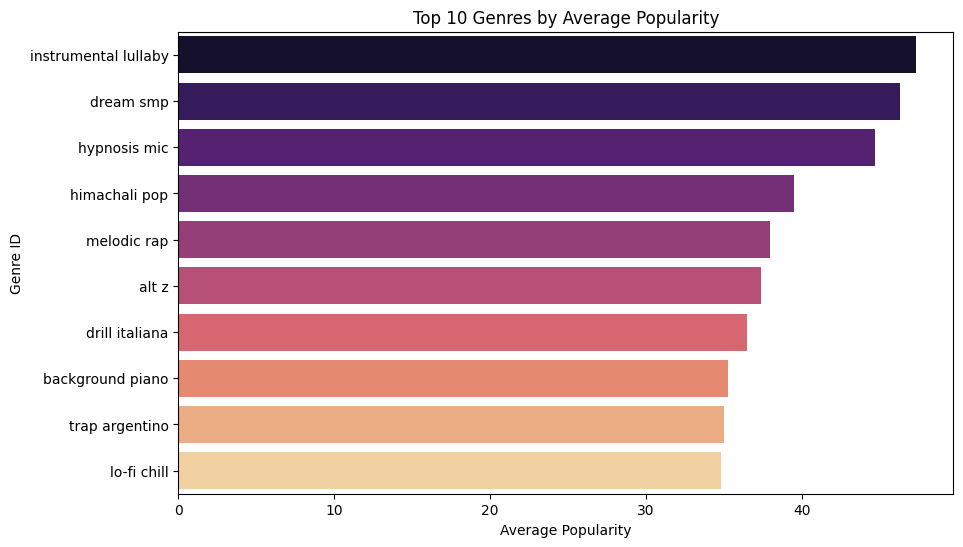

In [ ]:
query = """
SELECT
    genres.id AS genre_id,
    AVG(tracks.popularity) AS avg_popularity
FROM genres
JOIN r_artist_genre ON genres.id = r_artist_genre.genre_id
JOIN r_track_artist ON r_artist_genre.artist_id = r_track_artist.artist_id
JOIN tracks ON r_track_artist.track_id = tracks.id
GROUP BY genres.id
ORDER BY avg_popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='avg_popularity', y='genre_id', palette='magma')
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Genre ID")
plt.show()


**"Instrumental lullaby" is the most popular genre by average popularity, suggesting that niche, soothing, or purpose-driven music is highly favored by Spotify users compared to other genres.**

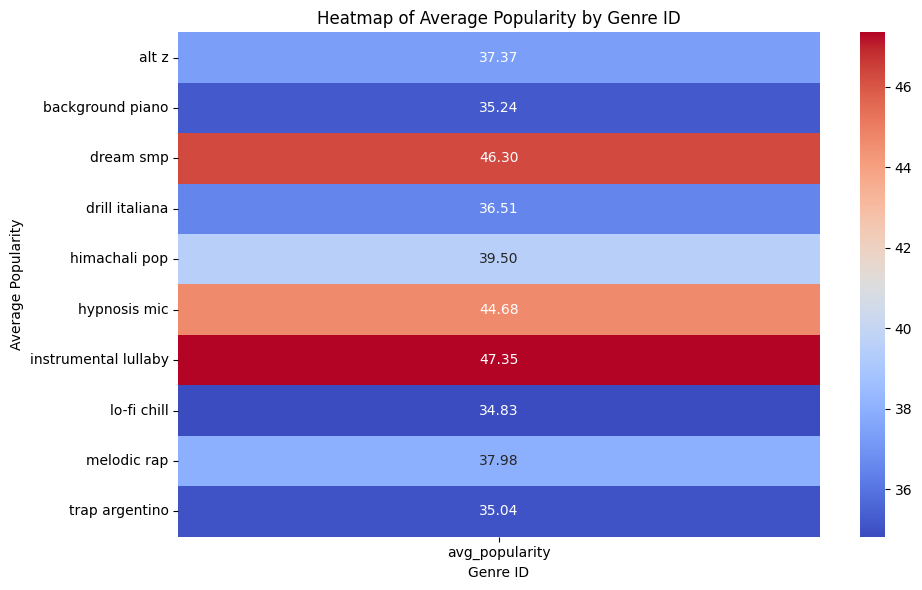

In [ ]:
heatmap_data = df.pivot_table(index='genre_id', values='avg_popularity')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Average Popularity by Genre ID")
plt.xlabel("Genre ID")
plt.ylabel("Average Popularity")
plt.tight_layout()
plt.show()


**The heatmap emphasizes that "Instrumental lullaby" and "Dream SMP" have the highest average popularity among genres**

In [ ]:
query = """
SELECT
    audio_features.energy AS energy,
    tracks.popularity AS popularity
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE tracks.popularity IS NOT NULL AND audio_features.energy IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

fig = px.scatter(df, x='energy', y='popularity', title="Energy vs. Popularity",
                 labels={'energy': 'Energy', 'popularity': 'Popularity'},
                 color='popularity')
fig.show()


Here we can conclude that there are many songs which have 0 popularity, which means either they have not got reviews or the data was damaged. And so should be considered as outliers. Overall we see that the data is spread equally so energy does not effect popularity. But also, when the energy is more than 0.4 , we see that popularity can be more than 70.

**higher energy levels tend to be more popular,this is helping the client understand listener preferences.**

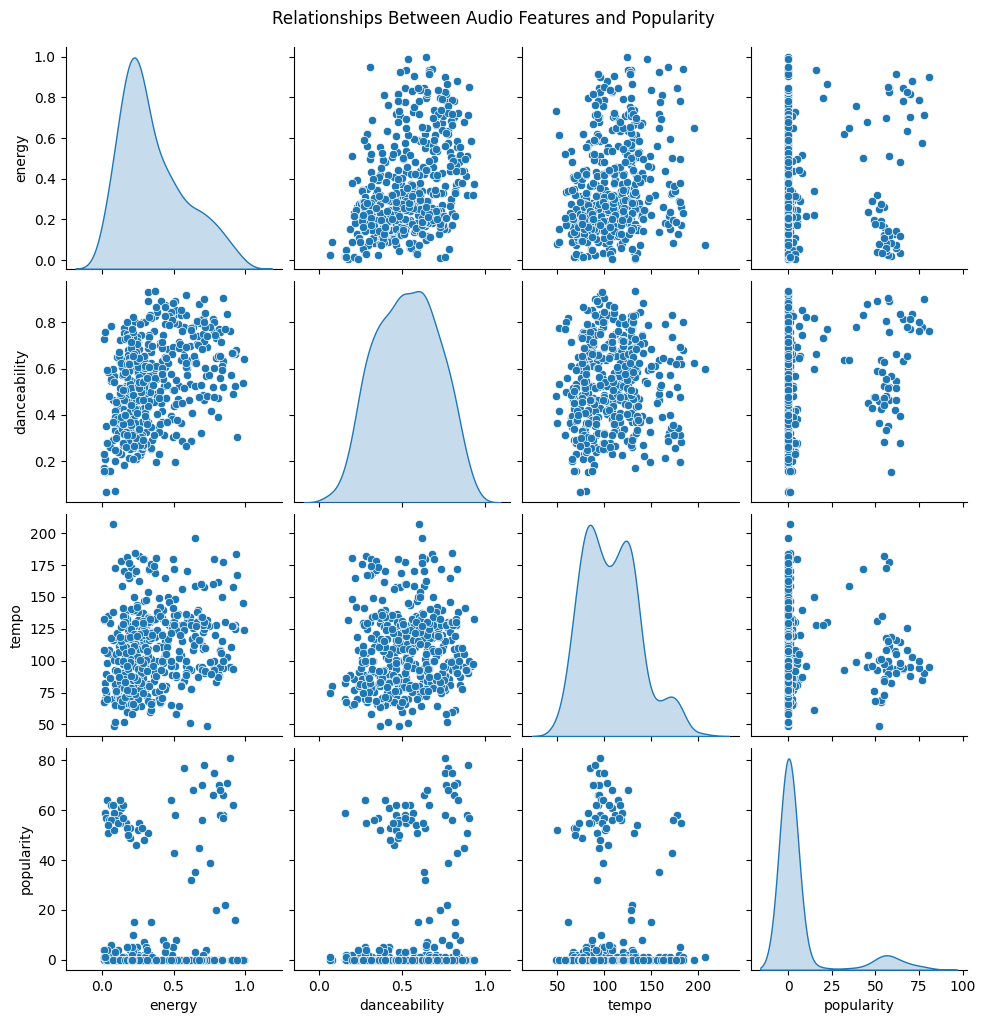

In [ ]:
query = """
SELECT
    audio_features.energy,
    audio_features.danceability,
    audio_features.tempo,
    tracks.popularity
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE audio_features.energy IS NOT NULL
AND audio_features.danceability IS NOT NULL
AND audio_features.tempo IS NOT NULL
AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

sns.pairplot(df, vars=['energy', 'danceability', 'tempo', 'popularity'], diag_kind='kde')
plt.suptitle("Relationships Between Audio Features and Popularity", y=1.02)
plt.show()


**The pair plot shows that there are weak or non-linear relationships between audio features (like energy, danceability, and tempo) and popularity, suggesting that no single audio feature strongly determines a track's success, but combinations or other factors may play a significant role.**

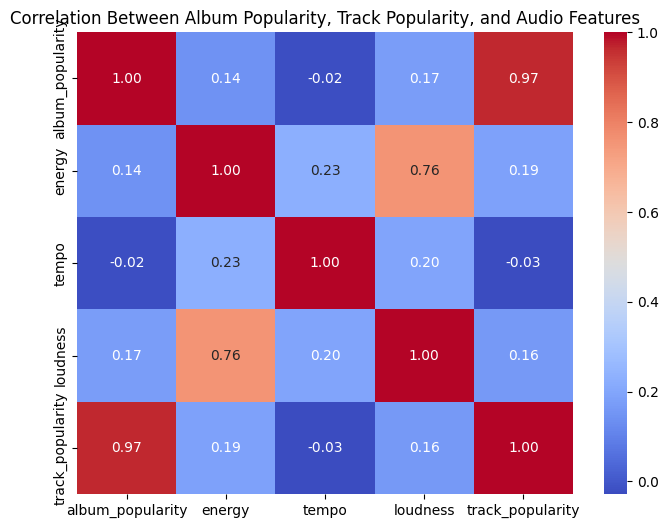

In [ ]:
query = """
SELECT
    albums.popularity AS album_popularity,
    audio_features.energy,
    audio_features.tempo,
    audio_features.loudness,
    tracks.popularity AS track_popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
JOIN audio_features ON tracks.id = audio_features.id
WHERE albums.popularity IS NOT NULL
AND audio_features.energy IS NOT NULL
AND audio_features.tempo IS NOT NULL
AND audio_features.loudness IS NOT NULL
AND tracks.popularity IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Album Popularity, Track Popularity, and Audio Features")
plt.show()


**The correlation matrix indicates a very strong positive relationship between album popularity and track popularity, while audio features like energy, tempo, and loudness show weak to moderate correlations with popularity. This shows  that external factors (e.g., marketing or artist reputation) likely drive popularity more than audio characteristics alone.Also loudness and energy have high correlation which assume that one can affect the other positively**

<ipython-input-36-b5a5c21842ff>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




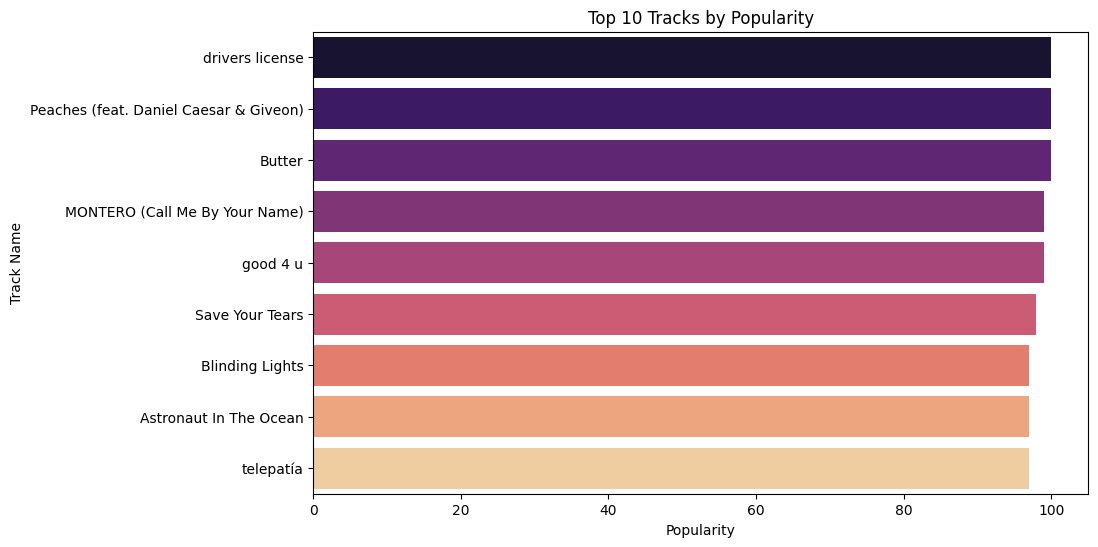

In [ ]:
query = """
SELECT
    tracks.name AS track_name,
    tracks.popularity
FROM tracks
WHERE tracks.popularity IS NOT NULL
ORDER BY tracks.popularity DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='popularity', y='track_name', palette='magma')
plt.title("Top 10 Tracks by Popularity")
plt.xlabel("Popularity")
plt.ylabel("Track Name")
plt.show()


**The chart reveals that "drivers license" is the most popular track among the top 10**

In [ ]:
query = "SELECT * FROM tracks LIMIT 5;"
df = pd.read_sql(query, conn)
print(df.columns)

Index(['id', 'disc_number', 'duration', 'explicit', 'audio_feature_id', 'name',
       'preview_url', 'track_number', 'popularity', 'is_playable'],
      dtype='object')


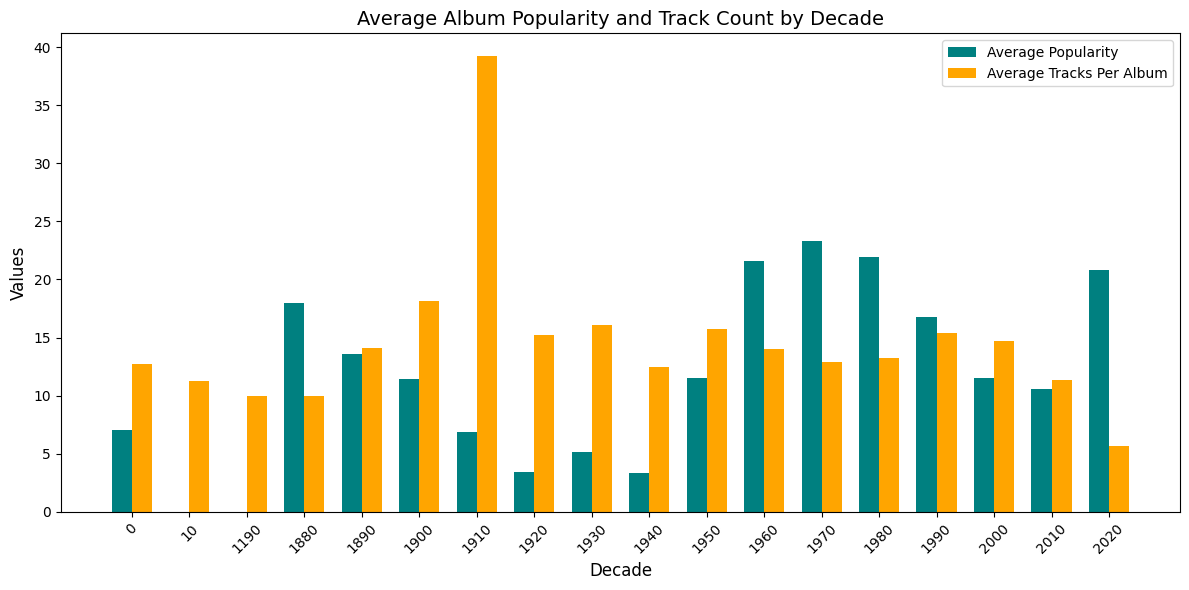

In [ ]:

query = """
SELECT
    (strftime('%Y', albums.release_date/1000, 'unixepoch') / 10) * 10 AS decade,
    AVG(albums.popularity) AS avg_popularity,
    AVG(track_counts.track_count) AS avg_tracks_per_album
FROM albums
JOIN (
    SELECT
        album_id,
        COUNT(track_id) AS track_count
    FROM r_albums_tracks
    GROUP BY album_id
) AS track_counts ON albums.id = track_counts.album_id
WHERE albums.release_date IS NOT NULL
GROUP BY decade
ORDER BY decade;
"""
df = pd.read_sql(query, conn)

x = df['decade'].astype(str)
width = 0.35

x_indexes = range(len(x))

plt.figure(figsize=(12, 6))

plt.bar([i - width/2 for i in x_indexes], df['avg_popularity'], width=width, color='teal', label='Average Popularity')
plt.bar([i + width/2 for i in x_indexes], df['avg_tracks_per_album'], width=width, color='orange', label='Average Tracks Per Album')

plt.xlabel('Decade', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Average Album Popularity and Track Count by Decade', fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()


the chart shows that albums from the 2020s are the more popular, meaning people prefer listening to recent music more than older ones.As there are some songs from 0 year which means they are either should be corrected manually or removed from the data. Also we cannot conclude that there are too many songs which have not been recorded, as during all the decades the average

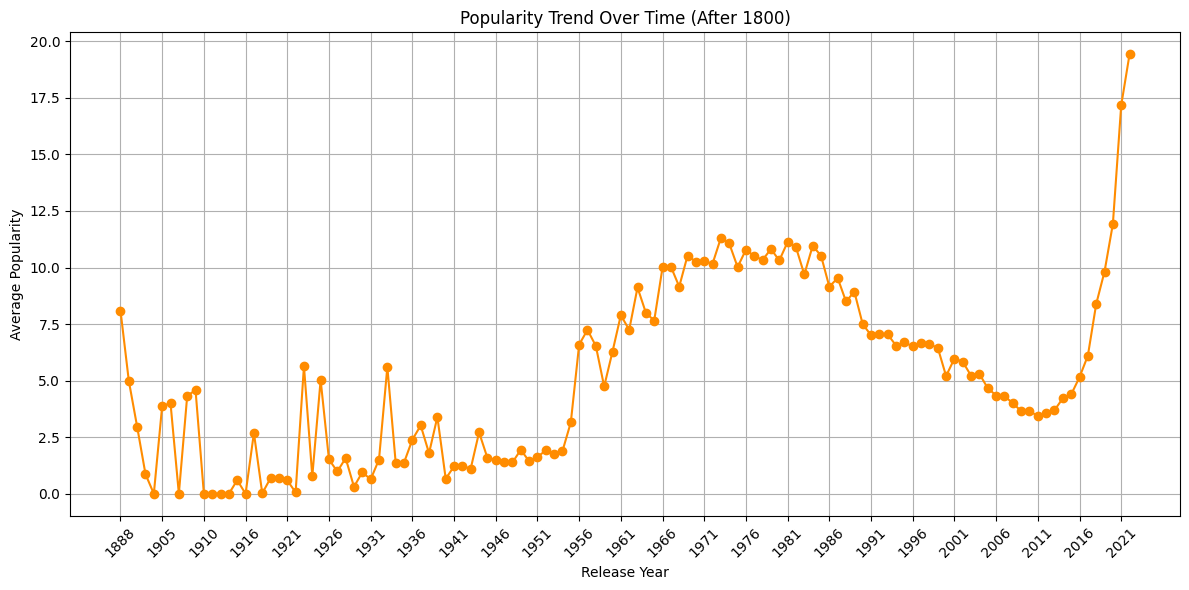

In [ ]:

query = """
SELECT
    strftime('%Y', release_date/1000, 'unixepoch') AS release_year,
    AVG(tracks.popularity) AS avg_popularity
FROM albums
JOIN r_albums_tracks ON albums.id = r_albums_tracks.album_id
JOIN tracks ON r_albums_tracks.track_id = tracks.id
WHERE release_date IS NOT NULL
    AND strftime('%Y', release_date/1000, 'unixepoch') > '1800'
GROUP BY release_year
ORDER BY release_year;
"""
df = pd.read_sql(query, conn)

plt.figure(figsize=(12, 6))
plt.plot(df['release_year'], df['avg_popularity'], marker='o', linestyle='-', color='darkorange')
plt.title("Popularity Trend Over Time (After 1800)")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.grid()


every_nth = 5
plt.xticks(ticks=range(0, len(df['release_year']), every_nth), labels=df['release_year'][::every_nth], rotation=45)

plt.tight_layout()
plt.show()


**This line shows how the average popularity of tracks has changed over time. It starts low, rises gradually, goes through some ups and downs, and ends with a big increase in recent years. It means music from recent years is generally more appreciated or listened to.**

In [ ]:
query = """
SELECT
    tracks.popularity,
    audio_features.tempo,
    audio_features.energy,
    ABS(audio_features.loudness) AS loudness
FROM tracks
JOIN audio_features ON tracks.id = audio_features.id
WHERE tracks.popularity IS NOT NULL
  AND audio_features.tempo IS NOT NULL
  AND audio_features.energy IS NOT NULL
  AND audio_features.loudness IS NOT NULL
LIMIT 500;
"""
df = pd.read_sql(query, conn)

fig = px.scatter(
    df,
    x='tempo',
    y='energy',
    size='loudness',
    color='popularity',
    labels={'tempo': 'Tempo (BPM)', 'energy': 'Energy', 'popularity': 'Popularity', 'loudness': 'Loudness'},
    title="Bubble Chart: Popularity, Tempo, and Energy (Bubble Size = Loudness)",
    template="plotly_dark"
)

fig.update_traces(marker=dict(opacity=0.8, line=dict(width=1, color='DarkSlateGrey')))
fig.update_layout(xaxis_title="Tempo (BPM)", yaxis_title="Energy")
fig.show()


**The bubble chart shows that tracks with higher energy and tempo tend to have higher popularity, with larger bubbles (louder tracks) often appearing in the more popular range.**

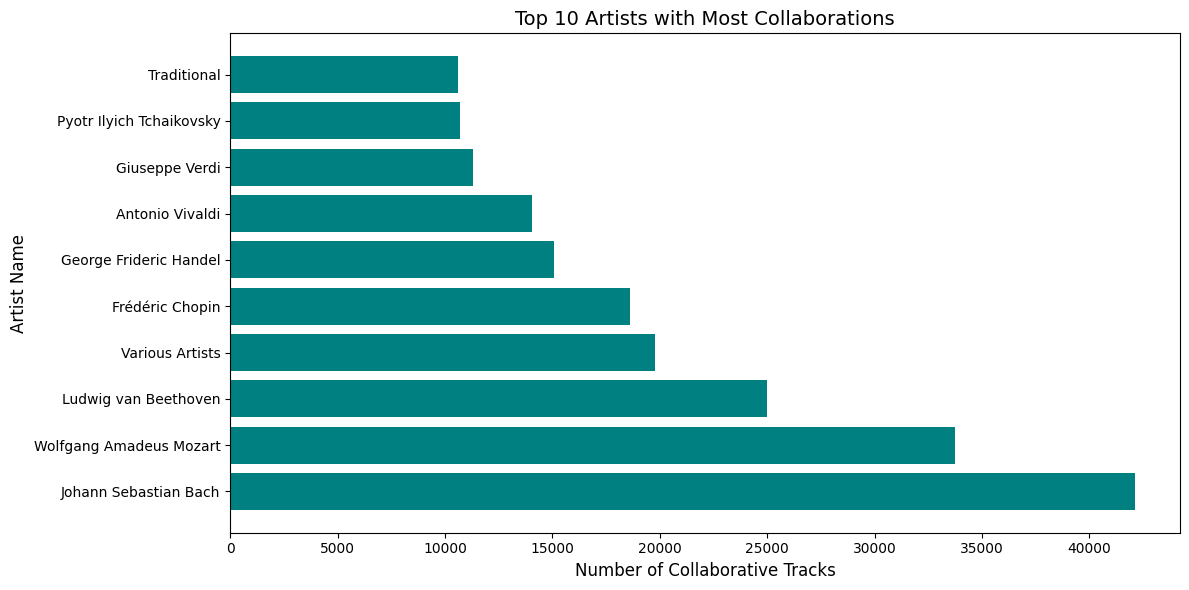

In [ ]:
collaborative_artists_df = pd.read_sql_query('''
SELECT
    artists.name AS artist_name,
    COUNT(DISTINCT tracks.id) AS collaborative_tracks
FROM
    artists
JOIN
    r_track_artist ON artists.id = r_track_artist.artist_id
JOIN
    tracks ON r_track_artist.track_id = tracks.id
GROUP BY
    artist_name
HAVING
    COUNT(DISTINCT tracks.id) > 5
ORDER BY
    collaborative_tracks DESC
LIMIT 10;
''', conn)

plt.figure(figsize=(12, 6))
plt.barh(collaborative_artists_df['artist_name'], collaborative_artists_df['collaborative_tracks'], color='teal')
plt.xlabel('Number of Collaborative Tracks', fontsize=12)
plt.ylabel('Artist Name', fontsize=12)
plt.title('Top 10 Artists with Most Collaborations', fontsize=14)
plt.tight_layout()
plt.show()

Here are some artists which have the most colloborations. This features can be used in the future when a new songs will be created.

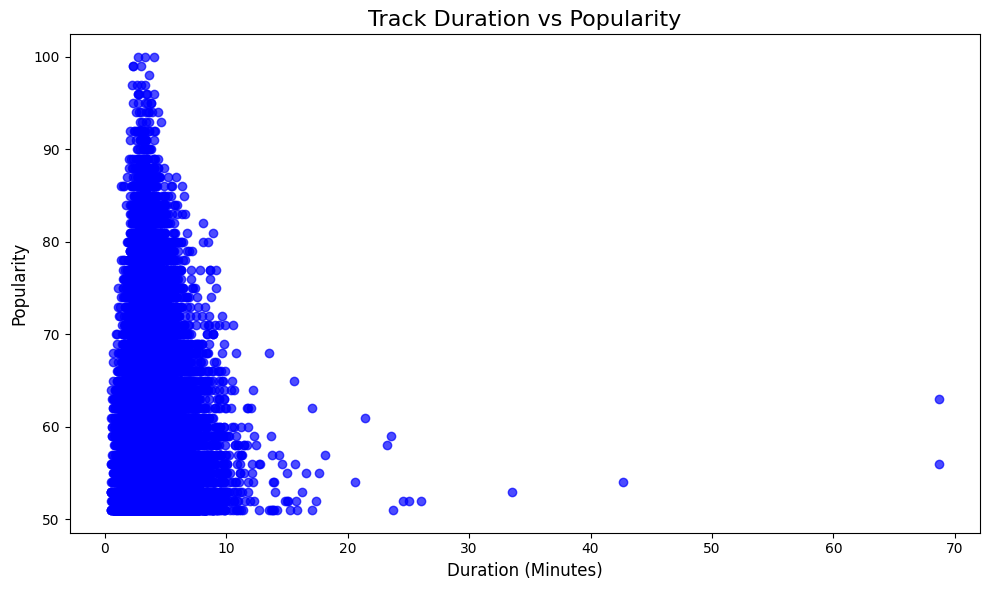

In [ ]:
query = """
SELECT
    tracks.name AS track_name,
    audio_features.duration / 60000.0 AS duration_minutes,
    tracks.popularity
FROM
    audio_features
JOIN
    tracks ON audio_features.id = tracks.audio_feature_id
WHERE
    tracks.popularity > 50
ORDER BY
    duration_minutes DESC;
"""
duration_popularity_df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
plt.scatter(duration_popularity_df['duration_minutes'], duration_popularity_df['popularity'], alpha=0.7, color='blue')
plt.title('Track Duration vs Popularity', fontsize=16)
plt.xlabel('Duration (Minutes)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.tight_layout()
plt.show()


Here we see that songs which have less than 10 minutes duration tend to have more popularity. This can be explained as that are more songs with less than 10 minutes duration, and can be more engaging.